## Final Project - Early Sepis Prediction




### Project outcome is to identify SepsisLabel ∈ {0, 1}
- 1 indicates sepsis is predicted to occur within the next 6 hours (i.e., early warning).
- 0 means no sepsis expected in that time window.

##1. Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### import the required library

In [ ]:
# import required files
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#from dmba import classificationSummary
#from dmba import plotDecisionTree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Sepsis/Dataset.csv')

In [ ]:
# Let us see sample 10 rows
df.sample(10)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
1510885,36,36,71.0,94.0,NaN,110.0,80.0,59.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.00,1,0.0,1.0,-18.82,37,0,110382
878846,25,25,59.0,96.0,NaN,133.0,85.0,71.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.00,0,1.0,0.0,-31.69,26,0,101758
494711,14,14,93.0,NaN,NaN,141.0,100.0,89.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.68,0,1.0,0.0,-0.03,16,0,3675
1539750,4,4,100.0,97.0,NaN,101.0,89.0,76.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.00,1,1.0,0.0,-393.94,5,0,101761
1237537,19,19,86.0,96.0,NaN,140.0,98.0,76.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.00,0,NaN,NaN,-0.02,20,0,106106
849402,23,23,84.0,93.0,NaN,116.0,82.0,68.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,1,1.0,0.0,-3.54,24,0,107566
1461411,18,18,74.0,96.0,NaN,140.0,106.0,75.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.00,0,NaN,NaN,-6.76,19,0,109248
1192563,38,38,84.0,96.0,36.8,143.0,121.0,105.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.00,1,0.0,1.0,-11.87,39,0,114841
923611,1,1,107.0,100.0,NaN,125.0,91.0,67.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.00,1,1.0,0.0,-5.85,2,0,107142
331411,2,2,113.0,97.0,36.3,97.0,67.0,51.0,18.0,NaN,-1.0,NaN,0.6,7.32,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.04,1,0.0,1.0,-4.38,5,0,884


#### Data Description:
The dataset contains time-series data for ICU patients. Each row represents one hour of observation for a specific patient (id). The features fall into 4 categories
**1. Vitals (Real-Time Monitoring Variables)**
- HR | Heart rate | beats per minute
- O2Sat | Oxygen saturation via pulse oximetry | %
- Temp | Body temperature | degrees Celsius
- SBP | Systolic blood pressure | mmHg
- MAP | Mean arterial pressure | mmHg
- DBP | Diastolic blood pressure | mmHg
- Resp | Respiratory rate | breaths per minute
- EtCO2 | End-tidal CO₂ | mmHg (optional)

**2. Laboratory Measurements**

- BaseExcess | Excess base in blood | mmol/L
- HCO3 | Bicarbonate level | mmol/L
- FiO2 | Fraction of inspired oxygen | %
- pH | Blood pH level | —
- PaCO2 | Arterial CO₂ pressure | mmHg
- SaO2 | Arterial oxygen saturation | %
- AST | Aspartate aminotransferase (liver enzyme) | IU/L
- BUN | Blood urea nitrogen | mg/dL
- Alkalinephos | Alkaline phosphatase | IU/L
- Calcium | Calcium level | mg/dL
- Chloride | Chloride level | mmol/L
- Creatinine | Kidney function marker | mg/dL
- Bilirubin_direct | Direct bilirubin | mg/dL
- Glucose | Blood glucose | mg/dL
- Lactate | Lactic acid concentration | mmol/L
- Magnesium | Magnesium level | mmol/L
- Phosphate | Phosphate level | mg/dL
- Potassium | Potassium level | mmol/L
- Bilirubin_total | Total bilirubin | mg/dL
- TroponinI | Cardiac marker | ng/mL
- Hct | Hematocrit | %
- Hgb | Hemoglobin | g/dL
- PTT | Partial thromboplastin time | seconds
- WBC | White blood cell count | count/L
- Fibrinogen | Fibrinogen level | mg/dL
- Platelets | Platelet count | count/mL

**3. Demographics / Administrative**
- Age | Age of the patient (in years)
- Gender | 0 = Female, 1 = Male
- Unit1 | 1 if in MICU (Medical ICU), else 0
- Unit2 | 1 if in SICU (Surgical ICU), else 0
- HospAdmTime | Time between hospital & ICU admission (hours)
- ICULOS | ICU length of stay at current time step

** 4. Target Variable**
 - SepsisLabel	1 if the patient is in a window 6 hours before sepsis onset, else 0

#### Exploratory Data Analysis

In [ ]:
# Let us see the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

#### Observations:
- There are total 1552210 rows and 44 columns present in the dataset
- As we can see the lot of missing values.

In [ ]:
# Let us see the shape of the dataset
df.shape

(1552210, 44)

In [ ]:
# Let us see the summary statistics of the dataset
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1552210.0,25.492745,28.882557,0.00,9.00,19.000,33.00,335.00
Hour,1552210.0,25.492745,28.882557,0.00,9.00,19.000,33.00,335.00
HR,1398811.0,84.581443,17.325242,20.00,72.00,83.500,95.50,280.00
O2Sat,1349474.0,97.193955,2.936924,20.00,96.00,98.000,99.50,100.00
Temp,525226.0,36.977228,0.770014,20.90,36.50,37.000,37.50,50.00
SBP,1325945.0,123.750465,23.231556,20.00,107.00,121.000,138.00,300.00
MAP,1358940.0,82.400100,16.341750,20.00,71.00,80.000,92.00,300.00
DBP,1065656.0,63.830556,13.956010,20.00,54.00,62.000,72.00,300.00
Resp,1313875.0,18.726498,5.098194,1.00,15.00,18.000,21.50,100.00
EtCO2,57636.0,32.957657,7.951662,10.00,28.00,33.000,38.00,100.00


### Let us analyze the missing values

In [ ]:
# columns with the missing values
print("Columns with Most Missing Values:")
print(df.isnull().sum().sort_values(ascending=False))

Columns with Most Missing Values:
Bilirubin_direct    1549220
Fibrinogen          1541968
TroponinI           1537429
Bilirubin_total     1529069
Alkalinephos        1527269
AST                 1527027
Lactate             1510764
PTT                 1506511
SaO2                1498649
EtCO2               1494574
Phosphate           1489909
HCO3                1487182
Chloride            1481744
BaseExcess          1468065
PaCO2               1465909
Calcium             1460879
Platelets           1460001
Creatinine          1457594
Magnesium           1454259
WBC                 1452763
BUN                 1445642
pH                  1444637
Hgb                 1437619
FiO2                1422845
Hct                 1414777
Potassium           1407685
Glucose             1286694
Temp                1026984
Unit2                611960
Unit1                611960
DBP                  486554
Resp                 238335
SBP                  226265
O2Sat                202736
MAP           

#### Let us analyze the missing values

<Axes: >

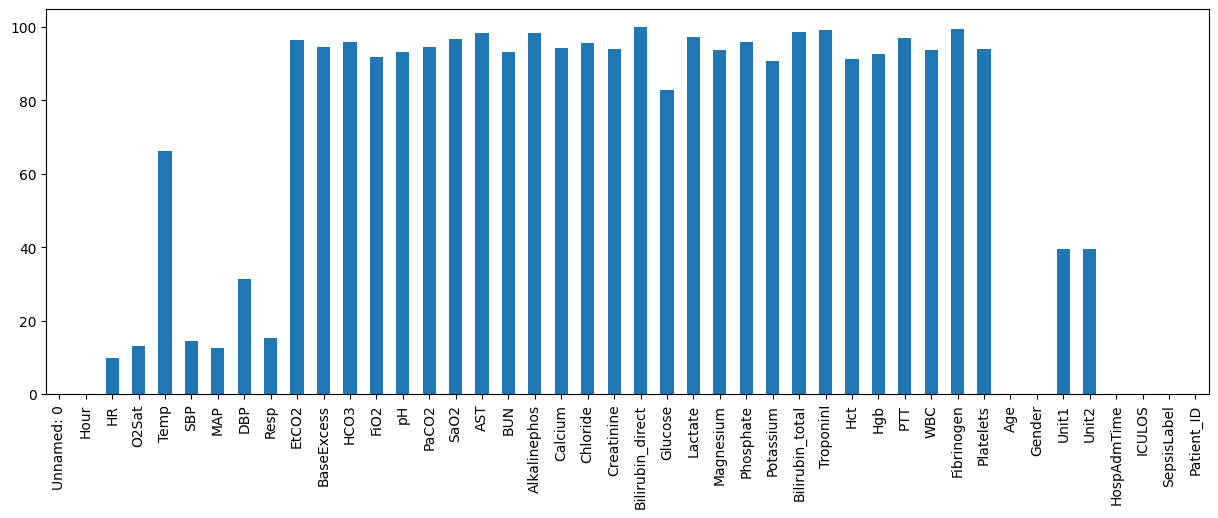

In [ ]:
round(100*(df.isnull().sum()/len(df.index)),2).plot.bar(figsize=(15,5))

#### Observations:
- There are lot of missing values as we can see in the bar graph.
- For all lab values , more than 80% of data are missing.
- We will handle those appropriately later.

SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64


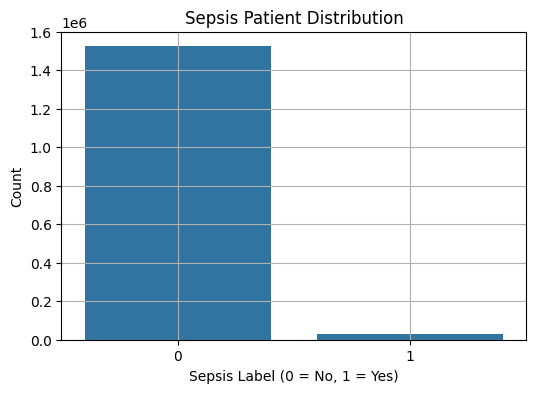

In [ ]:
from matplotlib import pyplot as plt
sepsis_patient = df['SepsisLabel'].value_counts()
print(sepsis_patient)
# Step 3: Sepsis Label Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SepsisLabel")
plt.title("Sepsis Patient Distribution")
plt.xlabel("Sepsis Label (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Observations:
-  In our dataset there are total 27916 rows with septis value

### Data Preprocessing


#### Divide patients to 3 types - NonSepsis, SepsisAfterAdm , SepsisBeforeAdm

In [ ]:
# get the list of patients who have sepsis
septic_shock_patients=df['Patient_ID'][df['SepsisLabel']==1].unique()

# construct dataframe of patients with sepsis alone
septic_df=df[df.Patient_ID.isin(septic_shock_patients)]

# get the list of patients who have sepsis before admission to ICU
admitted_with_sepsis_patients=df['Patient_ID'][(df['SepsisLabel']==1) & (df['Hour']==0)]


# construct dataframe of patients who have sepsis before admission to ICU
admitted_with_sepsis_df=df[df.Patient_ID.isin(admitted_with_sepsis_patients)]

# construct dataframe of patients who have sepsis after admission to ICU
sepsis_after_adm_df=septic_df.merge(admitted_with_sepsis_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

# construct dataframe of patients who have no sepsis
non_septic_df = df.merge(septic_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']


# add a new column sepsisType in dataframe with value null
df['sepsisType']=np.nan

# update sepsisType to SepsisBeforeAdm for patients who were admitted to ICU with sepsis
df.loc[df.Patient_ID.isin(admitted_with_sepsis_patients), 'sepsisType'] = 'SepsisBeforeAdm'


# update sepsisType to SepsisAfterAdm for patients who contracted sepsis after admission to ICU
df.loc[df.Patient_ID.isin(septic_shock_patients) & df['sepsisType'].isnull(), 'sepsisType'] = 'SepsisAfterAdm'


# update sepsisType to NonSepsis for patients who never got Sepsis
df.loc[df['sepsisType'].isnull(), 'sepsisType'] = 'NonSepsis'


In [ ]:
df['sepsisType'].value_counts()

,count
sepsisType,
NonSepsis,1379800
SepsisAfterAdm,168764
SepsisBeforeAdm,3646


<Axes: xlabel='sepsisType'>

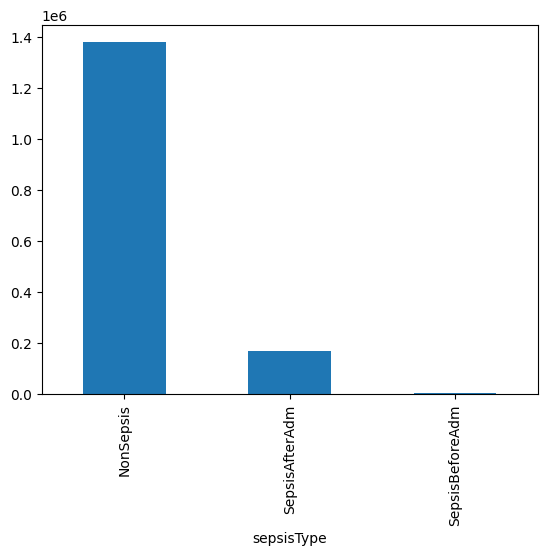

In [ ]:
df['sepsisType'].value_counts().plot.bar()

In [ ]:
#total no:of patients
len(pd.unique(df['Patient_ID']))

40336

In [ ]:
#total number of septic patients whose are sepsis after admission
print(len(pd.unique(sepsis_after_adm_df['Patient_ID'])))
print(" ")
print(len(pd.unique(non_septic_df['Patient_ID'])))

2506
 
37404


In [ ]:
#total no:of septic patients
len(pd.unique(septic_df['Patient_ID']))

2932

In [ ]:
#total number of septic patients whose are sepsis before admission
len(pd.unique(admitted_with_sepsis_df['Patient_ID']))

426

In [ ]:
# Filter for patients with SepsisAfterAdm or NonSepsis
filtered_df = df[df['sepsisType'].isin(['SepsisAfterAdm', 'NonSepsis'])]
filtered_df.shape

(1548564, 45)

In [ ]:
# Let us see 5 sample rows
df.sample(5)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
1417224,43,43,95.0,96.0,NaN,99.0,76.00,68.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00,0,1.0,0.0,-33.98,44,0,115799,NonSepsis
552640,19,19,92.0,97.0,NaN,120.0,91.00,73.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.73,0,1.0,0.0,-0.01,20,0,5813,NonSepsis
681741,34,34,76.0,92.0,NaN,NaN,82.00,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.14,1,NaN,NaN,-69.35,37,0,6734,NonSepsis
198495,21,21,70.0,100.0,NaN,132.0,92.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,1.0,0.0,-13.81,23,0,13984,NonSepsis
1069905,2,2,111.0,100.0,36.4,87.0,75.00,65.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,1,0.0,1.0,-99.74,3,0,102854,NonSepsis


In [ ]:
# Let us observe the dataset after handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 45 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [ ]:
# Ensure sorting by time for each patient
df = df.sort_values(['Patient_ID', 'ICULOS'])

In [ ]:
df.head(30)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
132940,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1,NonSepsis
132941,1,1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1,NonSepsis
132942,2,2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1,NonSepsis
132943,3,3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,NaN,7.36,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1,NonSepsis
132944,4,4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1,NonSepsis
132945,5,5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0,1,NonSepsis
132946,6,6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0,1,NonSepsis
132947,7,7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0,1,NonSepsis
132948,8,8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0,1,NonSepsis
132949,9,9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0,1,NonSepsis


#### Observations:
- we can see that there are multiple value for the same patient.
- so next we are going to take the latest result for each patient

## 2. Feature Engineering

#### Handling missing values:
- Forward-fill (ffill) and backward-fill (bfill) per patient (id)

In [ ]:
# Forward fill and backward fill missing values per patient
df = df.groupby('Patient_ID').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)

In [ ]:
df.head(30)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,0,0,97.0,95.0,36.11,98.0,75.33,NaN,19.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,1,0,1,NonSepsis
1,1,1,97.0,95.0,36.11,98.0,75.33,NaN,19.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,2,0,1,NonSepsis
2,2,2,89.0,99.0,36.11,122.0,86.00,NaN,22.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,3,0,1,NonSepsis
3,3,3,90.0,95.0,36.11,122.0,86.00,NaN,30.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,4,0,1,NonSepsis
4,4,4,103.0,88.5,36.11,122.0,91.33,NaN,24.5,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,5,0,1,NonSepsis
5,5,5,110.0,91.0,36.11,122.0,91.33,NaN,22.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,6,0,1,NonSepsis
6,6,6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,7,0,1,NonSepsis
7,7,7,106.0,90.5,36.11,93.0,76.33,NaN,29.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,8,0,1,NonSepsis
8,8,8,104.0,95.0,36.11,133.0,88.33,NaN,26.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,9,0,1,NonSepsis
9,9,9,102.0,91.0,36.11,134.0,87.33,NaN,30.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,NaN,NaN,-0.03,10,0,1,NonSepsis


#### Let us remove sepsisType column as we created this


In [ ]:
df = df.drop(columns=["sepsisType"])
# Let us drop few unnecessary columns
df = df.drop(columns=["Unit1", "Unit2","ICULOS"])

In [ ]:
df.head(30)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,SepsisLabel,Patient_ID
0,0,0,97.0,95.0,36.11,98.0,75.33,NaN,19.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
1,1,1,97.0,95.0,36.11,98.0,75.33,NaN,19.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
2,2,2,89.0,99.0,36.11,122.0,86.00,NaN,22.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
3,3,3,90.0,95.0,36.11,122.0,86.00,NaN,30.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
4,4,4,103.0,88.5,36.11,122.0,91.33,NaN,24.5,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
5,5,5,110.0,91.0,36.11,122.0,91.33,NaN,22.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
6,6,6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
7,7,7,106.0,90.5,36.11,93.0,76.33,NaN,29.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
8,8,8,104.0,95.0,36.11,133.0,88.33,NaN,26.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1
9,9,9,102.0,91.0,36.11,134.0,87.33,NaN,30.0,NaN,24.0,45.0,0.28,7.36,100.0,88.0,16.0,14.0,98.0,9.3,85.0,0.7,NaN,193.0,NaN,2.0,3.3,3.8,0.3,NaN,37.2,12.5,NaN,5.7,NaN,317.0,83.14,0,-0.03,0,1


In [ ]:
# Check for remaining missing values
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0].index.tolist()

In [ ]:
print(missing_summary)

Unnamed: 0                0
Hour                      0
HR                      142
O2Sat                   374
Temp                   7430
SBP                   10976
MAP                    2698
DBP                  259250
Resp                   1999
EtCO2               1396040
BaseExcess           988909
HCO3                 749934
FiO2                 779588
pH                   736170
PaCO2                757691
SaO2                 977591
AST                  924613
BUN                   50192
Alkalinephos         931524
Calcium              151755
Chloride             697025
Creatinine            50842
Bilirubin_direct    1447694
Glucose               42046
Lactate              986175
Magnesium            136397
Phosphate            380584
Potassium             47697
Bilirubin_total      928213
TroponinI           1271344
Hct                   58774
Hgb                   61519
PTT                  701626
WBC                   65619
Fibrinogen          1338307
Platelets           

#### Observations:
- We can see that there are missing values in the aggregated dataset even after performing forward fill and backward fill.
- Now we're going to fill those with median.

In [ ]:
# Fill remaining missing values with median
if missing_cols:
    for col in missing_cols:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

In [ ]:
# Show missing values after all steps
print("Remaining Missing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Remaining Missing Values:
Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 41 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1552210 non-null  float64
 3   O2Sat             1552210 non-null  float64
 4   Temp              1552210 non-null  float64
 5   SBP               1552210 non-null  float64
 6   MAP               1552210 non-null  float64
 7   DBP               1552210 non-null  float64
 8   Resp              1552210 non-null  float64
 9   EtCO2             1552210 non-null  float64
 10  BaseExcess        1552210 non-null  float64
 11  HCO3              1552210 non-null  float64
 12  FiO2              1552210 non-null  float64
 13  pH                1552210 non-null  float64
 14  PaCO2             1552210 non-null  float64
 15  SaO2              1552210 non-null  float64
 16  

#### Excluding patients who already had sepsis before admitting to hospital
-  Since we are measuring sepsis before 6hr of hospital admission so we need to exclude those patients before handling the missing values

In [ ]:
# Remove patients who had sepsis at ICU admission (if early detection is not feasible)
df = df[~((df['Hour'] == 0) & (df['SepsisLabel'] == 1))]

In [ ]:
# Remove patients who had sepsis at ICU admission (if early detection is not feasible)
patient_ids_to_remove = df[(df['Hour'] == 0) & (df['SepsisLabel'] == 1)]['Patient_ID'].unique()
df = df[~df['Patient_ID'].isin(patient_ids_to_remove)]


In [ ]:
df.shape

(1551784, 41)

### Extracting 6-Hour-Prior Rows for Sepsis Prediction

This code block prepares the final dataset used for model training by extracting a single representative row per patient. The goal is to simulate a realistic early prediction setting, where we aim to identify sepsis **at least 6 hours prior to clinical onset**.

- For **septic patients**, we identify the first hour (`t_sepsis`) when sepsis is labeled. We then:
  - Extract the row at `t_sepsis - 6` if it exists.
  - If not available, fallback to the last available record for that patient.
  - In both cases, we manually mark the row with `SepsisLabel = 1` to indicate proximity to onset.

- For **non-septic patients**, we:
  - Take the 6th-to-last row if the patient has 6 or more hourly observations.
  - Otherwise, fallback to the final row.
  - These rows are labeled with `SepsisLabel = 0`.

Finally, we group the dataset by `Patient_ID`, apply the function to each patient subgroup, and export the resulting single-row-per-patient dataset for downstream analysis and modeling.


In [ ]:
# Function to get the 6-hour-prior row (or fallback) for each patient
def extract_prediction_row(group):
    if group['SepsisLabel'].sum() > 0:
        tsepsis = group[group['SepsisLabel'] == 1]['Hour'].min()
        prediction_hour = tsepsis - 6
        if prediction_hour in group['Hour'].values:
            row = group[group['Hour'] == prediction_hour].copy()
        else:
            row = group.iloc[[-1]].copy()  # fallback: take last row
        row['SepsisLabel'] = 1  # mark as septic
    else:
        if len(group) >= 6:
            row = group.iloc[[-6]].copy()
        else:
            row = group.iloc[[-1]].copy()
        row['SepsisLabel'] = 0  # mark as non-septic
    return row

result_df = df.groupby("Patient_ID", group_keys=False).apply(extract_prediction_row).reset_index(drop=True)

# Displaying the result summary
print(f"Final dataset shape: {result_df.shape}")
print(result_df[['Patient_ID', 'Hour', 'SepsisLabel']].head())

# Save if needed
result_df.to_csv("Processed_Sepsis_Prediction_Rows.csv", index=False)

Final dataset shape: (40336, 41)
   Patient_ID  Hour  SepsisLabel
0           1    48            0
1           2    17            0
2           3    42            0
3           4    23            0
4           5    42            0


In [ ]:
result_df.head(30)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,SepsisLabel,Patient_ID
0,48,48,100.0,86.5,36.33,181.0,104.00,62.0,30.0,33.0,19.0,48.0,0.25,7.32,100.0,89.0,16.0,22.0,98.0,9.6,85.0,0.7,0.3,133.0,1.52,2.2,3.7,4.6,0.3,0.11,36.2,12.2,30.7,14.7,275.0,338.0,83.14,0,-0.03,0,1
1,17,17,55.0,97.0,36.00,114.0,52.00,36.0,16.0,33.0,0.0,22.0,0.45,7.40,40.0,97.0,33.0,100.0,71.0,7.9,113.0,2.5,0.3,78.0,1.52,2.5,4.4,5.1,0.8,0.11,27.8,9.7,30.7,11.0,275.0,158.0,75.91,0,-98.60,0,2
2,42,42,72.0,97.0,37.06,151.0,92.00,63.0,28.0,33.0,5.0,29.0,0.80,7.49,38.0,97.0,33.0,25.0,71.0,11.0,100.0,0.8,0.3,130.0,1.52,2.4,2.9,4.1,0.8,0.11,32.1,11.0,29.5,8.7,275.0,486.0,45.82,0,-1195.71,0,3
3,23,23,107.0,97.0,36.39,125.0,62.33,51.5,15.0,33.0,0.0,22.0,0.45,7.41,41.0,98.0,33.0,19.0,71.0,8.2,108.0,0.8,0.3,69.0,1.52,2.4,3.8,4.3,0.8,0.11,24.0,8.3,22.3,7.6,275.0,144.0,65.71,0,-8.77,0,4
4,42,42,80.0,98.0,37.28,141.0,93.00,62.0,14.0,33.0,0.0,28.0,0.45,7.40,40.0,97.0,16.0,6.0,62.0,8.2,106.0,0.7,0.3,103.0,1.52,2.5,2.8,3.6,0.6,0.11,39.7,14.4,29.0,8.0,275.0,276.0,28.09,1,-0.05,0,5
5,11,11,87.0,99.0,36.72,122.0,80.00,62.0,43.0,33.0,0.0,29.0,0.40,7.34,47.0,97.0,33.0,9.0,71.0,8.4,111.0,0.7,0.3,73.0,1.40,2.0,3.4,3.8,0.8,0.11,36.9,12.2,30.7,12.0,275.0,298.0,52.01,1,-0.03,0,6
6,39,39,112.0,96.0,38.39,111.0,76.00,61.5,14.0,33.0,-9.0,13.0,0.40,7.33,27.0,97.0,452.0,64.0,88.0,7.3,115.0,3.9,0.3,252.0,2.20,1.6,3.5,3.9,1.4,0.11,40.2,14.5,27.1,8.8,275.0,47.0,64.24,1,-0.05,0,7
7,34,34,68.0,100.0,36.00,108.0,62.00,44.0,17.0,33.0,-8.0,15.0,0.45,7.36,26.0,97.0,33.0,31.0,71.0,7.9,106.0,1.2,0.3,108.0,1.50,1.9,3.5,5.0,0.8,0.11,25.0,8.6,30.7,9.4,275.0,205.0,87.08,1,-2.23,0,8
8,242,242,135.0,97.0,38.67,136.0,101.00,82.0,31.0,33.0,1.0,23.0,0.35,7.45,37.0,97.0,33.0,22.0,71.0,7.5,112.0,0.7,0.3,128.0,1.50,2.4,2.0,4.0,0.8,0.11,28.5,9.2,24.4,13.6,477.5,693.0,27.92,1,-0.03,1,9
9,17,17,83.0,96.0,37.30,111.0,72.00,55.0,17.0,33.0,0.0,25.0,0.40,7.40,38.0,96.0,33.0,17.0,71.0,8.4,105.0,1.1,0.3,92.0,1.10,2.1,3.4,3.7,0.8,0.11,32.8,10.9,29.9,9.9,275.0,107.0,76.71,0,-2.36,0,10


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40336 entries, 0 to 40335
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40336 non-null  int64  
 1   Hour              40336 non-null  int64  
 2   HR                40336 non-null  float64
 3   O2Sat             40336 non-null  float64
 4   Temp              40336 non-null  float64
 5   SBP               40336 non-null  float64
 6   MAP               40336 non-null  float64
 7   DBP               40336 non-null  float64
 8   Resp              40336 non-null  float64
 9   EtCO2             40336 non-null  float64
 10  BaseExcess        40336 non-null  float64
 11  HCO3              40336 non-null  float64
 12  FiO2              40336 non-null  float64
 13  pH                40336 non-null  float64
 14  PaCO2             40336 non-null  float64
 15  SaO2              40336 non-null  float64
 16  AST               40336 non-null  float6

In [ ]:
df_agg = result_df.copy()

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40336 entries, 0 to 40335
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40336 non-null  int64  
 1   Hour              40336 non-null  int64  
 2   HR                40336 non-null  float64
 3   O2Sat             40336 non-null  float64
 4   Temp              40336 non-null  float64
 5   SBP               40336 non-null  float64
 6   MAP               40336 non-null  float64
 7   DBP               40336 non-null  float64
 8   Resp              40336 non-null  float64
 9   EtCO2             40336 non-null  float64
 10  BaseExcess        40336 non-null  float64
 11  HCO3              40336 non-null  float64
 12  FiO2              40336 non-null  float64
 13  pH                40336 non-null  float64
 14  PaCO2             40336 non-null  float64
 15  SaO2              40336 non-null  float64
 16  AST               40336 non-null  float6

In [ ]:
# Verifying the data.
patient_id_to_find = 5328  # Replace with the actual Patient_ID you want to find

# Finding the row based on Patient_ID
row = df_agg[df_agg['Patient_ID'] == patient_id_to_find]

# Print the row if found, otherwise indicate it wasn't found.
if not row.empty:
  print(row)
else:
  print(f"No row found for Patient_ID: {patient_id_to_find}")


      Unnamed: 0  Hour     HR  O2Sat   Temp   SBP   MAP   DBP  Resp  EtCO2  \
5327           8     8  122.0   98.0  36.22  70.0  46.0  62.0  21.0   33.0   

      BaseExcess  HCO3  FiO2    pH  PaCO2  SaO2   AST   BUN  Alkalinephos  \
5327        -1.0  25.0  0.45  7.36   46.0  97.0  33.0  19.0          71.0   

      Calcium  Chloride  Creatinine  Bilirubin_direct  Glucose  Lactate  \
5327      7.8     101.0         2.9               0.3    122.0      4.7   

      Magnesium  Phosphate  Potassium  Bilirubin_total  TroponinI   Hct   Hgb  \
5327        1.6        2.6        3.4              0.8       0.11  32.9  10.1   

        PTT   WBC  Fibrinogen  Platelets    Age  Gender  HospAdmTime  \
5327  150.0  21.4       190.0      217.0  70.13       0        -2.55   

      SepsisLabel  Patient_ID  
5327            1        5328  


In [ ]:
df_agg.shape

(40336, 41)

In [ ]:
missing = df_agg.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

Series([], dtype: int64)


In [ ]:
df_agg.head(50)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,SepsisLabel,Patient_ID
0,48,48,100.0,86.5,36.33,181.0,104.00,62.0,30.0,33.0,19.0,48.0,0.25,7.32,100.0,89.0,16.0,22.0,98.0,9.6,85.0,0.7,0.3,133.0,1.52,2.2,3.7,4.6,0.3,0.11,36.2,12.2,30.7,14.7,275.0,338.0,83.14,0,-0.03,0,1
1,17,17,55.0,97.0,36.00,114.0,52.00,36.0,16.0,33.0,0.0,22.0,0.45,7.40,40.0,97.0,33.0,100.0,71.0,7.9,113.0,2.5,0.3,78.0,1.52,2.5,4.4,5.1,0.8,0.11,27.8,9.7,30.7,11.0,275.0,158.0,75.91,0,-98.60,0,2
2,42,42,72.0,97.0,37.06,151.0,92.00,63.0,28.0,33.0,5.0,29.0,0.80,7.49,38.0,97.0,33.0,25.0,71.0,11.0,100.0,0.8,0.3,130.0,1.52,2.4,2.9,4.1,0.8,0.11,32.1,11.0,29.5,8.7,275.0,486.0,45.82,0,-1195.71,0,3
3,23,23,107.0,97.0,36.39,125.0,62.33,51.5,15.0,33.0,0.0,22.0,0.45,7.41,41.0,98.0,33.0,19.0,71.0,8.2,108.0,0.8,0.3,69.0,1.52,2.4,3.8,4.3,0.8,0.11,24.0,8.3,22.3,7.6,275.0,144.0,65.71,0,-8.77,0,4
4,42,42,80.0,98.0,37.28,141.0,93.00,62.0,14.0,33.0,0.0,28.0,0.45,7.40,40.0,97.0,16.0,6.0,62.0,8.2,106.0,0.7,0.3,103.0,1.52,2.5,2.8,3.6,0.6,0.11,39.7,14.4,29.0,8.0,275.0,276.0,28.09,1,-0.05,0,5
5,11,11,87.0,99.0,36.72,122.0,80.00,62.0,43.0,33.0,0.0,29.0,0.40,7.34,47.0,97.0,33.0,9.0,71.0,8.4,111.0,0.7,0.3,73.0,1.40,2.0,3.4,3.8,0.8,0.11,36.9,12.2,30.7,12.0,275.0,298.0,52.01,1,-0.03,0,6
6,39,39,112.0,96.0,38.39,111.0,76.00,61.5,14.0,33.0,-9.0,13.0,0.40,7.33,27.0,97.0,452.0,64.0,88.0,7.3,115.0,3.9,0.3,252.0,2.20,1.6,3.5,3.9,1.4,0.11,40.2,14.5,27.1,8.8,275.0,47.0,64.24,1,-0.05,0,7
7,34,34,68.0,100.0,36.00,108.0,62.00,44.0,17.0,33.0,-8.0,15.0,0.45,7.36,26.0,97.0,33.0,31.0,71.0,7.9,106.0,1.2,0.3,108.0,1.50,1.9,3.5,5.0,0.8,0.11,25.0,8.6,30.7,9.4,275.0,205.0,87.08,1,-2.23,0,8
8,242,242,135.0,97.0,38.67,136.0,101.00,82.0,31.0,33.0,1.0,23.0,0.35,7.45,37.0,97.0,33.0,22.0,71.0,7.5,112.0,0.7,0.3,128.0,1.50,2.4,2.0,4.0,0.8,0.11,28.5,9.2,24.4,13.6,477.5,693.0,27.92,1,-0.03,1,9
9,17,17,83.0,96.0,37.30,111.0,72.00,55.0,17.0,33.0,0.0,25.0,0.40,7.40,38.0,96.0,33.0,17.0,71.0,8.4,105.0,1.1,0.3,92.0,1.10,2.1,3.4,3.7,0.8,0.11,32.8,10.9,29.9,9.9,275.0,107.0,76.71,0,-2.36,0,10


In [ ]:
df_agg.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,40336.0,32.045171,21.950736,0.00,18.0000,32.00,41.00,330.00
Hour,40336.0,32.045171,21.950736,0.00,18.0000,32.00,41.00,330.00
HR,40336.0,83.556550,16.919128,20.00,71.0000,82.00,94.00,180.00
O2Sat,40336.0,96.836808,3.301870,20.00,95.0000,97.00,99.00,100.00
Temp,40336.0,36.851958,0.678987,26.60,36.4000,36.80,37.28,41.00
SBP,40336.0,124.109158,22.822706,24.00,108.0000,122.00,138.50,274.00
MAP,40336.0,82.925936,16.380083,20.00,71.6700,81.00,92.33,298.00
DBP,40336.0,64.028869,13.043714,20.00,56.0000,62.00,70.00,292.00
Resp,40336.0,18.835941,4.947425,1.00,16.0000,18.00,21.50,96.00
EtCO2,40336.0,33.030543,3.264463,10.00,33.0000,33.00,33.00,100.00


#### Let us define the features X and dependent variable y

In [ ]:
# Define label: did this patient ever develop sepsis?
labels = df_agg.groupby("Patient_ID")["SepsisLabel"].max()

In [ ]:
# Let's define X and y
X = df_agg.drop(columns=["SepsisLabel","Hour","HospAdmTime"])
y = labels

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40336 entries, 0 to 40335
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40336 non-null  int64  
 1   HR                40336 non-null  float64
 2   O2Sat             40336 non-null  float64
 3   Temp              40336 non-null  float64
 4   SBP               40336 non-null  float64
 5   MAP               40336 non-null  float64
 6   DBP               40336 non-null  float64
 7   Resp              40336 non-null  float64
 8   EtCO2             40336 non-null  float64
 9   BaseExcess        40336 non-null  float64
 10  HCO3              40336 non-null  float64
 11  FiO2              40336 non-null  float64
 12  pH                40336 non-null  float64
 13  PaCO2             40336 non-null  float64
 14  SaO2              40336 non-null  float64
 15  AST               40336 non-null  float64
 16  BUN               40336 non-null  float6

In [ ]:
# Let us see the random 10 values from final dataset
X.sample(10)

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Patient_ID
24698,31,80.0,100.0,36.20,96.0,75.00,64.0,18.0,33.0,0.0,24.0,0.45,7.40,40.0,97.0,24.0,8.0,60.0,8.4,106.0,0.68,0.3,110.0,1.52,1.7,4.0,3.5,0.4,0.01,37.30,12.1,30.7,5.6,275.0,341.0,35.00,0,104363
34410,39,124.0,90.0,36.70,102.0,82.00,67.0,22.0,33.0,0.0,24.0,0.32,7.39,47.0,98.0,33.0,23.0,68.0,9.2,106.0,0.80,0.3,134.0,1.52,2.0,3.4,4.1,0.6,0.11,30.70,9.6,30.7,8.4,275.0,294.0,100.00,0,114075
3288,8,78.0,94.0,37.11,119.0,76.33,62.0,18.0,33.0,0.0,18.0,0.45,7.40,40.0,97.0,51.0,23.0,394.0,8.5,107.0,0.50,0.3,93.0,1.52,2.6,3.3,4.3,2.5,0.11,36.40,12.6,29.4,8.5,275.0,172.0,80.87,0,3289
32289,60,91.0,97.0,36.20,125.0,41.00,53.0,18.0,33.0,0.0,24.0,0.45,7.40,40.0,97.0,55.0,26.0,102.0,8.0,106.0,0.93,0.3,125.0,1.52,2.4,3.4,4.0,2.0,0.88,29.35,8.6,30.7,11.4,275.0,216.0,100.00,0,111954
312,37,72.0,99.0,35.83,117.0,73.67,69.0,31.0,33.0,0.0,21.0,0.45,7.37,40.0,97.0,33.0,14.0,71.0,8.7,106.0,0.70,0.3,87.0,1.52,2.2,3.4,4.7,0.8,0.11,26.30,8.6,29.6,15.5,275.0,592.0,51.28,0,313
16735,5,65.5,86.5,35.06,85.0,38.50,62.0,10.0,33.0,0.0,24.0,0.35,7.40,40.0,97.0,33.0,17.0,71.0,8.4,106.0,0.90,0.3,122.0,1.52,2.0,3.4,4.0,0.8,0.11,31.40,10.5,30.7,10.2,275.0,191.0,84.08,1,16736
11233,19,60.0,97.0,36.06,166.0,96.00,62.0,11.0,33.0,0.0,21.0,0.45,7.40,40.0,97.0,33.0,121.0,71.0,7.9,108.0,2.80,0.3,81.0,1.52,2.3,5.8,4.1,0.8,0.11,33.80,6.0,30.2,7.9,275.0,220.0,68.33,0,11234
38374,31,94.0,98.0,36.00,108.0,66.00,48.0,20.0,33.0,0.0,24.0,0.45,7.40,40.0,97.0,25.0,32.0,1650.0,8.8,106.0,1.21,0.3,152.0,1.52,2.6,2.7,3.7,1.2,0.03,22.10,7.3,30.7,4.0,275.0,69.0,84.00,1,118039
20339,53,116.5,100.0,37.70,159.0,102.00,85.0,13.0,33.0,0.0,24.0,0.45,7.40,40.0,97.0,33.0,17.0,71.0,8.4,106.0,0.90,0.3,122.0,1.52,2.0,3.4,4.0,0.8,0.11,31.40,10.5,30.7,10.2,275.0,191.0,67.00,1,100004
27840,22,72.0,100.0,37.20,131.0,88.00,68.0,10.0,33.0,0.0,24.0,0.45,7.40,40.0,97.0,54.0,10.0,82.0,9.4,106.0,0.88,0.2,118.0,1.52,1.6,5.5,3.9,1.3,0.01,30.10,10.4,32.3,10.8,65.0,42.0,57.00,0,107505


In [ ]:
# Let us see the shape of features and dependent variable
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (40336, 38)
y shape: (40336,)


#### Let us observe response variable y

In [ ]:
y.value_counts()

,count
SepsisLabel,
0,37404
1,2932


#### Observations:
- we can see that there are 2932 patients who identified as sepis patient too
- Data is imbalanced so we will do oversampling and undersampling for better model

In [ ]:
# Now let us split the dataset in training and validation set(80-20)
# since training y is imbalanced so we will use stratify = y
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Let us oversample the dataset
os = SMOTE()
Xtrainos, ytrainos = os.fit_resample(Xtrain, ytrain)

# Let us undersample the dataset
us = RandomUnderSampler()
Xtrainus, ytrainus = us.fit_resample(Xtrain, ytrain)

# Let us observe the shape of the dataset
print("X_train:", Xtrain.shape)
print("")
print("X_Valid:", Xvalid.shape)
print("")
print("y_train:", ytrain.shape)
print("")
print("y_valid:", yvalid.shape)
print("")


print("X_trainos:", Xtrainos.shape)
print("")
print("y_trainos:", ytrainos.shape)
print("")
print("X_trainus:", Xtrainus.shape)
print("")
print("y_trainus:", ytrainus.shape)


X_train: (32268, 38)

X_Valid: (8068, 38)

y_train: (32268,)

y_valid: (8068,)

X_trainos: (59844, 38)

y_trainos: (59844,)

X_trainus: (4692, 38)

y_trainus: (4692,)


## Logistics Regression

In [ ]:
scaler = StandardScaler()
# Original dataset
Xtrain_scaled = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)

Xvalid_scaled = pd.DataFrame(scaler.transform(Xvalid), columns= Xvalid.columns)

# oversample dataset
Xtrainos_scaled = pd.DataFrame(scaler.fit_transform(Xtrainos), columns=Xtrainos.columns)

# under sample dataset
Xtrainus_scaled = pd.DataFrame(scaler.fit_transform(Xtrainus), columns=Xtrainus.columns)

In [ ]:
# Let us observe top 5 rows
print(Xtrain_scaled.head())
print("")
print(Xvalid_scaled.head())
print("")
print(Xtrainos_scaled.head())
print("")
print(Xtrainus_scaled.head())

   Unnamed: 0        HR     O2Sat      Temp       SBP       MAP       DBP  \
0    0.459638 -1.510656 -1.181693 -0.812033  0.608693  0.186092  0.152591   
1   -1.150597 -0.387831  0.661328 -0.959019 -0.926650 -0.423607 -0.695295   
2    0.689672 -1.392464  0.661328 -0.268183 -0.180912 -0.789426 -1.234859   
3    0.137591 -0.210543  0.968498 -0.003608 -0.268646  0.186092  0.229671   
4   -0.966570  0.971378  0.046987 -0.077101  0.608693  0.612882  0.075510   

       Resp     EtCO2  BaseExcess      HCO3      FiO2        pH     PaCO2  \
0  0.235754 -0.006936   -0.773312 -0.116391  0.250011  0.298462 -0.726573   
1  0.640641 -0.006936    0.013213 -0.116391 -1.334193  0.077573 -0.043828   
2 -0.169133 -0.006936   -1.297662 -2.175727 -0.470082  0.961129 -2.262749   
3 -0.169133 -0.006936    0.013213 -0.116391 -0.110036  0.077573 -0.043828   
4  0.843084 -0.006936    0.013213 -0.116391 -0.110036  0.077573 -0.043828   

       SaO2       AST       BUN  Alkalinephos   Calcium  Chloride  Creatin

#### Let us model Logistic Regression

In [ ]:
# ORIGINAL
lg = LogisticRegression()
lg.fit(Xtrain_scaled, ytrain)
y_pred = lg.predict(Xvalid_scaled)
print("Logistic Regression on Original dataset:")
print(classification_report(yvalid, y_pred))
print()

# OVERSAMPLED
lg = LogisticRegression()
lg.fit(Xtrainos_scaled, ytrainos)
y_pred = lg.predict(Xvalid_scaled)
print("Logistic Regression on Oversample dataset:")
print(classification_report(yvalid, y_pred))
print()

# UNDERSAMPLED
lg = LogisticRegression()
lg.fit(Xtrainus_scaled, ytrainus)
y_pred = lg.predict(Xvalid_scaled)
print("Logistic Regression on undersample dataset:")
print(classification_report(yvalid, y_pred))
print()

Logistic Regression on Original dataset:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7482
           1       0.67      0.07      0.13       586

    accuracy                           0.93      8068
   macro avg       0.80      0.53      0.55      8068
weighted avg       0.91      0.93      0.90      8068


Logistic Regression on Oversample dataset:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71      7482
           1       0.12      0.73      0.20       586

    accuracy                           0.58      8068
   macro avg       0.54      0.64      0.46      8068
weighted avg       0.90      0.58      0.67      8068


Logistic Regression on undersample dataset:
              precision    recall  f1-score   support

           0       0.97      0.57      0.71      7482
           1       0.12      0.75      0.21       586

    accuracy                           0.58      806

#### Let us try to improve the model using Hyperparameter Tuning
##### Original datase

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Different optimization algorithms
    'penalty': ['l2']  # 'l1' requires saga, elasticnet would need 'l1_ratio' tuning as well
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Grid Search with 5-fold cross-validation
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(Xtrain_scaled, ytrain)

# Best model and parameters
best_log_reg = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_
print(f"Best parameter:{best_params_lr}")

# Predictions using the best model
y_pred_best_lr = best_log_reg.predict(Xvalid_scaled)


# Model evaluation

print(classification_report(yvalid, y_pred_best_lr))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameter:{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7482
           1       0.68      0.06      0.12       586

    accuracy                           0.93      8068
   macro avg       0.81      0.53      0.54      8068
weighted avg       0.91      0.93      0.90      8068



In [ ]:
##### Oversample and undersample
from sklearn.metrics import accuracy_score
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Different optimization algorithms
    'penalty': ['l2']  # 'l1' requires saga, elasticnet would need 'l1_ratio' tuning as well
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Grid Search with 5-fold cross-validation
grid_search_lr_os = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr_os.fit(Xtrainos_scaled, ytrainos)

# Best model and parameters
best_log_reg_os = grid_search_lr_os.best_estimator_
best_params_lr_os = grid_search_lr_os.best_params_
# Predictions using the best model
y_pred_best_lr_os = best_log_reg_os.predict(Xvalid_scaled)
# Model evaluation
print("Oversample Dataset:")
print(classification_report(yvalid, y_pred_best_lr_os))

print()
from sklearn.metrics import accuracy_score
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Different optimization algorithms
    'penalty': ['l2']  # 'l1' requires saga, elasticnet would need 'l1_ratio' tuning as well
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Grid Search with 5-fold cross-validation
grid_search_lr_us = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr_us.fit(Xtrainus_scaled, ytrainus)

# Best model and parameters
best_log_reg_us = grid_search_lr_us.best_estimator_
best_params_lr_us = grid_search_lr_us.best_params_
# Predictions using the best model
y_pred_best_lr_us = best_log_reg_us.predict(Xvalid_scaled)
# Model evaluation
print("Undersample Dataset:")
print(classification_report(yvalid, y_pred_best_lr_us))

Oversample Dataset:
              precision    recall  f1-score   support

           0       0.96      0.56      0.71      7482
           1       0.12      0.73      0.20       586

    accuracy                           0.58      8068
   macro avg       0.54      0.64      0.46      8068
weighted avg       0.90      0.58      0.67      8068


Undersample Dataset:
              precision    recall  f1-score   support

           0       0.97      0.57      0.71      7482
           1       0.12      0.75      0.21       586

    accuracy                           0.58      8068
   macro avg       0.54      0.66      0.46      8068
weighted avg       0.91      0.58      0.68      8068



### Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
y_pred_dt = dt.predict(Xvalid)
print("Result on Original data:")
print(classification_report(yvalid, y_pred_dt))
print()

# Oversample
dtos = DecisionTreeClassifier()
dtos.fit(Xtrainos, ytrainos)
y_pred_dt_os = dt.predict(Xvalid)
print("Result on Oversampled data:")
print(classification_report(yvalid, y_pred_dt_os))
print()

# undersample
dtus = DecisionTreeClassifier()
dtus.fit(Xtrainus, ytrainus)
y_pred_dt_us = dt.predict(Xvalid)
print("Result on undersampled data:")
print(classification_report(yvalid, y_pred_dt_us))
print()

Result on Original data:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7482
           1       0.49      0.53      0.51       586

    accuracy                           0.93      8068
   macro avg       0.72      0.74      0.73      8068
weighted avg       0.93      0.93      0.93      8068


Result on Oversampled data:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7482
           1       0.49      0.53      0.51       586

    accuracy                           0.93      8068
   macro avg       0.72      0.74      0.73      8068
weighted avg       0.93      0.93      0.93      8068


Result on undersampled data:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7482
           1       0.49      0.53      0.51       586

    accuracy                           0.93      8068
   macro avg       0.72      0.74      0.73 

## Pruned Decision Tree Model
#### Let us improve the model using hyperparameter tuning

In [ ]:
# we will find best parametr and use it in original dataset
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the decision tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt1 = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt1, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the undersampled data
grid_search.fit(Xtrain, ytrain)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the validation set
best_dt = grid_search.best_estimator_
y_pred_pt = best_dt.predict(Xvalid)
print(classification_report(yvalid, y_pred_pt))
print()

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score: 0.944650981848633
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7482
           1       0.72      0.48      0.58       586

    accuracy                           0.95      8068
   macro avg       0.84      0.73      0.77      8068
weighted avg       0.94      0.95      0.94      8068




#### Use the best parameters from the grid search to create oversampled and undersampled decision trees

In [ ]:
best_params = grid_search.best_params_
print(best_params)

# Oversampled Decision Tree
dt_os = DecisionTreeClassifier(**best_params)
dt_os.fit(Xtrainos, ytrainos)
y_pred_os = dt_os.predict(Xvalid)
print("Oversampled Decision Tree:")
print(classification_report(yvalid, y_pred_os))

# Undersampled Decision Tree
dt_us = DecisionTreeClassifier(**best_params)
dt_us.fit(Xtrainus, ytrainus)
y_pred_us = dt_us.predict(Xvalid)
print("Undersampled Decision Tree:")
print(classification_report(yvalid, y_pred_us))

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Oversampled Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      7482
           1       0.43      0.58      0.49       586

    accuracy                           0.91      8068
   macro avg       0.70      0.76      0.72      8068
weighted avg       0.93      0.91      0.92      8068

Undersampled Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7482
           1       0.25      0.77      0.38       586

    accuracy                           0.82      8068
   macro avg       0.62      0.80      0.64      8068
weighted avg       0.93      0.82      0.86      8068



### Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes Model

# ORIGINAL
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
y_pred_gb = gnb.predict(Xvalid)
print("Gaussian Naive Bayes Model in Original dataset::")
print(classification_report(yvalid, y_pred_gb))
print()

# OVERSAMPLED
gnb_os = GaussianNB()
gnb_os.fit(Xtrainos, ytrainos)
y_pred_gb_os = gnb_os.predict(Xvalid)
print("Gaussian Naive Bayes Model in Oversampled dataset::")
print(classification_report(yvalid, y_pred_gb_os))
print()

# UNDERSAMPLED
gnb_us = GaussianNB()
gnb_us.fit(Xtrainus, ytrainus)
y_pred_gb_us = gnb_us.predict(Xvalid)
print("Gaussian Naive Bayes Model in Undersampled dataset::")
print(classification_report(yvalid, y_pred_gb_us))
print()

Gaussian Naive Bayes Model in Original dataset::
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7482
           1       0.27      0.34      0.30       586

    accuracy                           0.89      8068
   macro avg       0.61      0.64      0.62      8068
weighted avg       0.90      0.89      0.89      8068


Gaussian Naive Bayes Model in Oversampled dataset::
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7482
           1       0.25      0.52      0.33       586

    accuracy                           0.85      8068
   macro avg       0.60      0.70      0.63      8068
weighted avg       0.91      0.85      0.87      8068


Gaussian Naive Bayes Model in Undersampled dataset::
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7482
           1       0.23      0.43      0.30       586

    accuracy              

### K-Nearest Neighbors

#### Let us scale the dataset for KNN

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xvalid_scaled = scaler.transform(Xvalid)
Xtrainos_scaled = scaler.fit_transform(Xtrainos)
Xtrainus_scaled = scaler.fit_transform(Xtrainus)

#### Let us run the model in original , oversmaple and undersample data

In [ ]:
# KNN Model with scaled data
knn = KNeighborsClassifier(n_neighbors = 9)

# ORIGINAL
knn.fit(Xtrain_scaled, ytrain)
y_pred_knn = knn.predict(Xvalid_scaled)
print("Original dataset::")
print(classification_report(yvalid, y_pred_knn))
print()

# OVERSAMPLED
knn.fit(Xtrainos_scaled, ytrainos)
y_pred_knn_os = knn.predict(Xvalid_scaled)
print("Oversample dataset::")
print(classification_report(yvalid, y_pred_knn_os))
print()

# UNDERSAMPLED
knn.fit(Xtrainus_scaled, ytrainus)
y_pred_knn_us = knn.predict(Xvalid_scaled)
print("Undersample dataset::")
print(classification_report(yvalid, y_pred_knn_us))
print()


Original dataset::
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7482
           1       0.85      0.10      0.17       586

    accuracy                           0.93      8068
   macro avg       0.89      0.55      0.57      8068
weighted avg       0.93      0.93      0.91      8068


Oversample dataset::
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7482
           1       0.17      0.60      0.26       586

    accuracy                           0.75      8068
   macro avg       0.56      0.68      0.56      8068
weighted avg       0.90      0.75      0.81      8068


Undersample dataset::
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7482
           1       0.20      0.39      0.27       586

    accuracy                           0.84      8068
   macro avg       0.58      0.64      0.59      8068
weighted a

### Bagging classifier

In [ ]:
# Bagging Classifier with Decision Tree

# Original Data
bagging_original = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_original.fit(Xtrain, ytrain)
y_pred_bagging_original = bagging_original.predict(Xvalid)
print("Bagging (Original):")
print(classification_report(yvalid, y_pred_bagging_original))
print()

# Oversampled Data
bagging_oversampled = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_oversampled.fit(Xtrainos, ytrainos)
y_pred_bagging_oversampled = bagging_oversampled.predict(Xvalid)
print("Bagging (Oversampled):")
print(classification_report(yvalid, y_pred_bagging_oversampled))
print()

# Undersampled Data
bagging_undersampled = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_undersampled.fit(Xtrainus, ytrainus)
y_pred_bagging_undersampled = bagging_undersampled.predict(Xvalid)
print("Bagging (Undersampled):")
print(classification_report(yvalid, y_pred_bagging_undersampled))
print()


Bagging (Original):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7482
           1       0.78      0.50      0.61       586

    accuracy                           0.95      8068
   macro avg       0.87      0.74      0.79      8068
weighted avg       0.95      0.95      0.95      8068


Bagging (Oversampled):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7482
           1       0.57      0.60      0.58       586

    accuracy                           0.94      8068
   macro avg       0.77      0.78      0.77      8068
weighted avg       0.94      0.94      0.94      8068


Bagging (Undersampled):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7482
           1       0.35      0.82      0.49       586

    accuracy                           0.87      8068
   macro avg       0.67      0.85      0.71      8068
weigh

### Let us try our model in the boosting classifier to see the performance

### Adaboosting Classifier

In [ ]:
#### Adaboosting in Original Dataset
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=50,
                                    learning_rate=0.1,
                                    random_state=42)
# Train the model
adaboost_model.fit(Xtrain, ytrain)
# Predict on test data
y_pred_ada = adaboost_model.predict(Xvalid)
print("Adaboosting in original data:")
print(classification_report(yvalid, y_pred_ada))
print("")

#### Adaboosting in Oversample Dataset
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=50,
                                    learning_rate=0.1,
                                    random_state=42)
# Train the model
adaboost_model.fit(Xtrainos, ytrainos)
# Predict on test data
y_pred_ada_os = adaboost_model.predict(Xvalid)
print("Adaboosting in Oversample data:")
print(classification_report(yvalid, y_pred_ada_os))

print("")

#### Adaboosting in Undersample Dataset
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=50,
                                    learning_rate=0.1,
                                    random_state=42)
# Train the model
adaboost_model.fit(Xtrainus, ytrainus)
# Predict on test data
y_pred_ada_us = adaboost_model.predict(Xvalid)
print("Adaboosting in Undersample data:")
print(classification_report(yvalid, y_pred_ada_us))

Adaboosting in original data:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7482
           1       0.90      0.17      0.29       586

    accuracy                           0.94      8068
   macro avg       0.92      0.59      0.63      8068
weighted avg       0.94      0.94      0.92      8068


Adaboosting in Oversample data:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7482
           1       0.39      0.54      0.45       586

    accuracy                           0.91      8068
   macro avg       0.68      0.74      0.70      8068
weighted avg       0.92      0.91      0.91      8068


Adaboosting in Undersample data:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7482
           1       0.41      0.66      0.51       586

    accuracy                           0.91      8068
   macro avg       0.69      0.

#### Gradient Boosting Classifier

In [ ]:
# Gradient Boosting classifier in original dataset
gb_model = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42)
gb_model.fit(Xtrain, ytrain)
y_pred_gb = gb_model.predict(Xvalid)
print("Gradient Boosting in Original dataset::")
print(classification_report(yvalid, y_pred_gb))
print("")

# Gradient Boosting classifier in oversample dataset
gb_model_os = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42)
gb_model_os.fit(Xtrainos, ytrainos)
y_pred_gb_os = gb_model_os.predict(Xvalid)
print("Gradient Boosting in Oversample dataset::")
print(classification_report(yvalid, y_pred_gb_os))
print("")

# Gradient Boosting classifier in undersample dataset
gb_model_us = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42)
gb_model_us.fit(Xtrainus, ytrainus)
y_pred_gb = gb_model_us.predict(Xvalid)
print("Gradient Boosting in Undersample dataset::")
print(classification_report(yvalid, y_pred_gb_us))
print("")

Gradient Boosting in Original dataset::
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7482
           1       0.83      0.50      0.63       586

    accuracy                           0.96      8068
   macro avg       0.90      0.75      0.80      8068
weighted avg       0.95      0.96      0.95      8068


Gradient Boosting in Oversample dataset::
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7482
           1       0.62      0.61      0.61       586

    accuracy                           0.94      8068
   macro avg       0.79      0.79      0.79      8068
weighted avg       0.94      0.94      0.94      8068


Gradient Boosting in Undersample dataset::
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7482
           1       0.23      0.43      0.30       586

    accuracy                           0.86      8068
 

### Random Forest Classifier

In [ ]:
# ORIGINAL
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain, ytrain)
y_pred_rf = rf.predict(Xvalid)
print("Original Dataset")
print(classification_report(yvalid, y_pred_rf))
print()

# OVERSAMPLED
rfos = RandomForestClassifier(random_state=42)
rfos.fit(Xtrainos, ytrainos)
y_pred_rfos = rf.predict(Xvalid)
print("Oversample Dataset")
print(classification_report(yvalid, y_pred_rfos))
print()

# UNDERSAMPLED
rfus = RandomForestClassifier(random_state=42)
rfus.fit(Xtrainus, ytrainus)
y_pred_rfus = rf.predict(Xvalid)
print("Undersample Dataset")
print(classification_report(yvalid, y_pred_rfus))
print()

Original Dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7482
           1       0.85      0.40      0.55       586

    accuracy                           0.95      8068
   macro avg       0.90      0.70      0.76      8068
weighted avg       0.95      0.95      0.94      8068


Oversample Dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7482
           1       0.85      0.40      0.55       586

    accuracy                           0.95      8068
   macro avg       0.90      0.70      0.76      8068
weighted avg       0.95      0.95      0.94      8068


Undersample Dataset
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7482
           1       0.85      0.40      0.55       586

    accuracy                           0.95      8068
   macro avg       0.90      0.70      0.76      8068
weighted avg    

#### Random forest with hyperparameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [5, 10, 20],  # Minimum number of samples to split a node
    'max_features': ['sqrt', 'log2']  # Number of features considered at each split
}

# Initialize the Random Forest model
rf_tuned = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)

# Get the best parameters
best_params = grid_search.best_params_
print(f"best parameter:{best_params}")

# Train the best Random Forest model
rf_best = RandomForestClassifier(**best_params,class_weight="balanced", random_state=42)
rf_best.fit(Xtrain, ytrain)

# Evaluate on test data
y_pred_rf_best = rf_best.predict(Xvalid)

#Generate classification report
print("RF on original data:")
print(classification_report(yvalid, y_pred_rf_best ))


print(classification_report(yvalid, y_pred_rf_best ))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
best parameter:{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 150}
RF on original data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7482
           1       0.87      0.30      0.45       586

    accuracy                           0.95      8068
   macro avg       0.91      0.65      0.71      8068
weighted avg       0.94      0.95      0.93      8068

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7482
           1       0.87      0.30      0.45       586

    accuracy                           0.95      8068
   macro avg       0.91      0.65      0.71      8068
weighted avg       0.94      0.95      0.93      8068



In [ ]:
#### over sample data with best parameter

# Train the best Random Forest model
rf_best_os = RandomForestClassifier(**best_params, random_state=42)
rf_best_os.fit(Xtrainos, ytrainos)

# Evaluate on test data
y_pred_rf_best_os = rf_best_os.predict(Xvalid)

# Generate classification report
print("")
print("RF on oversample data:")
print(classification_report(yvalid, y_pred_rf_best ))



#### Under sample data with best parameter
# Train the best Random Forest model
rf_best_us = RandomForestClassifier(**best_params, random_state=42)
rf_best_us.fit(Xtrainus, ytrainus)

# Evaluate on test data
y_pred_rf_best_us = rf_best_us.predict(Xvalid)

#Generate classification report

print("")
print("RF on undersample dataset:")
print(classification_report(yvalid, y_pred_rf_best_us ))


RF on oversample data:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7482
           1       0.28      0.88      0.43       586

    accuracy                           0.83      8068
   macro avg       0.64      0.85      0.67      8068
weighted avg       0.94      0.83      0.87      8068


RF on undersample dataset:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7482
           1       0.28      0.88      0.43       586

    accuracy                           0.83      8068
   macro avg       0.64      0.85      0.67      8068
weighted avg       0.94      0.83      0.87      8068



## Neural Networks

#### NN on Original dataset

In [ ]:
# Let us scale the dataset
# Initialize the scaler
scaler_nn = MinMaxScaler()

# Fit and transform the training data
Xtrain_scaled_nn = scaler_nn.fit_transform(Xtrain)
Xvalid_scaled_nn = scaler_nn.transform(Xvalid)
Xtrainos_scaled_nn = scaler_nn.fit_transform(Xtrainos)
Xtrainus_scaled_nn = scaler_nn.fit_transform(Xtrainus)



#Now let us define MLPClassifier
# interpretation of the parameters are:
# SGD = stochastic gradiant descent - allows for adjusting learning rate
# relu = Rectified linear Unit - good activation function, can also uselogistic if you want as well as many others
# learning rates = constant, invscaling which gradually mmdecreases
# and adaptive which adapts per epoch

nn = MLPClassifier(hidden_layer_sizes = (10,5,10),
                   activation = "relu",
                   solver = 'sgd',
                   learning_rate = "adaptive",
                   learning_rate_init= 0.01,
                   max_iter=500, warm_start = True, random_state=42)

model_nn = nn.fit(Xtrain_scaled_nn, ytrain)
prediction_nn = model_nn.predict(Xvalid_scaled_nn)

print(classification_report(yvalid, prediction_nn))


# Now we will check whether it is overfitting or not
# we will check on training and testing data

# Predict on training data
train_pred = model_nn.predict(Xtrain)
print("Training Classification Report:")
print(classification_report(ytrain, train_pred))



# Predict on validation data
test_pred = model_nn.predict(Xvalid)
print("Testing Classification Report:")
print(classification_report(yvalid, test_pred))



              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7482
           1       0.75      0.45      0.56       586

    accuracy                           0.95      8068
   macro avg       0.85      0.72      0.77      8068
weighted avg       0.94      0.95      0.94      8068

Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     29922
           1       0.21      0.04      0.07      2346

    accuracy                           0.92     32268
   macro avg       0.57      0.52      0.52     32268
weighted avg       0.88      0.92      0.89     32268

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7482
           1       0.14      0.03      0.05       586

    accuracy                           0.92      8068
   macro avg       0.53      0.51      0.50      8068
weighted av

#### NN on oversample Dataset

In [ ]:
nnos = MLPClassifier(hidden_layer_sizes = (10,5,10),
                   activation = "relu",
                   solver = 'sgd',
                   learning_rate = "adaptive",
                   learning_rate_init= 0.01,
                   max_iter=500, warm_start = True, random_state=42)

model_nn_os = nnos.fit(Xtrainos_scaled_nn, ytrainos)
prediction_nn_os = model_nn_os.predict(Xvalid_scaled_nn)

print(classification_report(yvalid, prediction_nn_os))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      7482
           1       0.15      0.59      0.24       586

    accuracy                           0.72      8068
   macro avg       0.55      0.66      0.53      8068
weighted avg       0.90      0.72      0.79      8068



#### NN on undersample Dataset

In [ ]:
nnus = MLPClassifier(hidden_layer_sizes = (10,5,10),
                   activation = "relu",
                   solver = 'sgd',
                   learning_rate = "adaptive",
                   learning_rate_init= 0.01,
                   max_iter=500, warm_start = True, random_state=42)

model_nn_us = nnus.fit(Xtrainus_scaled_nn, ytrainus)
prediction_nn_us = model_nn_us.predict(Xvalid_scaled_nn)

print(classification_report(yvalid, prediction_nn_us))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      7482
           1       0.23      0.44      0.30       586

    accuracy                           0.85      8068
   macro avg       0.59      0.66      0.61      8068
weighted avg       0.90      0.85      0.87      8068



### Support Vector Machine

#### Original dataset

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
Xtrain_scaled_svm = scaler.fit_transform(Xtrain)
Xvalid_scaled_svm = scaler.transform(Xvalid)
Xtrainos_scaled_svm = scaler.fit_transform(Xtrainos)
Xtrainus_scaled_svm = scaler.fit_transform(Xtrainus)

# Train SVM model with class balancing
svm_model = SVC(kernel="rbf", C=1.0, class_weight="balanced", probability=True)
svm_model.fit(Xtrain_scaled_svm, ytrain)
# Predictions
y_pred_svm = svm_model.predict(Xvalid_scaled_svm)

# Model evaluation

print(classification_report(yvalid, y_pred_svm))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7482
           1       0.38      0.58      0.46       586

    accuracy                           0.90      8068
   macro avg       0.67      0.75      0.70      8068
weighted avg       0.92      0.90      0.91      8068



#### svm for oversampled data

In [ ]:
# Train SVM model with class balancing
svm_model_os = SVC(kernel="rbf", C=1.0, probability=True)
svm_model_os.fit(Xtrainos_scaled_svm, ytrainos)
# Predictions
y_pred_svm_os = svm_model_os.predict(Xvalid_scaled_svm)

# Model evaluation

print(classification_report(yvalid, y_pred_svm_os))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      7482
           1       0.16      0.67      0.26       586

    accuracy                           0.72      8068
   macro avg       0.56      0.70      0.54      8068
weighted avg       0.91      0.72      0.79      8068



#### SVM for undersample data

In [ ]:

svm_model_us = SVC(kernel="rbf", C=1.0, probability=True)
svm_model_us.fit(Xtrainus_scaled_svm, ytrainus)
# Predictions
y_pred_svm_us = svm_model.predict(Xvalid_scaled_svm)

# Model evaluation

print(classification_report(yvalid, y_pred_svm_us))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7482
           1       0.38      0.58      0.46       586

    accuracy                           0.90      8068
   macro avg       0.67      0.75      0.70      8068
weighted avg       0.92      0.90      0.91      8068



## Ensemble of XGBoost Model

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost classifier for original dataset
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(Xtrain, ytrain)

# Evaluate
y_pred_xgb = xgb.predict(Xvalid)
print("XGBoost Model in original dataset::")
print(classification_report(yvalid, y_pred_xgb))


# XGBoost for Oversample
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb_os = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_os.fit(Xtrainos, ytrainos)
y_pred_xgb = xgb_os.predict(Xvalid)
print()
print("XGBoost Model in Oversample dataset::")
print(classification_report(yvalid, y_pred_xgb))



# XGBoost for Oversample
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb_us = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_us.fit(Xtrainus, ytrainus)
y_pred_xgb = xgb_us.predict(Xvalid)
print()
print("XGBoost Model in Undersample dataset::")
print(classification_report(yvalid, y_pred_xgb))

XGBoost Model in original dataset::
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7482
           1       0.79      0.52      0.63       586

    accuracy                           0.95      8068
   macro avg       0.88      0.75      0.80      8068
weighted avg       0.95      0.95      0.95      8068


XGBoost Model in Oversample dataset::
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7482
           1       0.76      0.57      0.65       586

    accuracy                           0.96      8068
   macro avg       0.86      0.78      0.81      8068
weighted avg       0.95      0.96      0.95      8068


XGBoost Model in Undersample dataset::
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7482
           1       0.32      0.84      0.47       586

    accuracy                           0.86      8068
   macro avg 

## 3. Evaluation: Clinical Utility Score

#### A weighted score that rewards catching sepsis (TP) and heavily penalizes missing it (FN) while lightly penalizing false alarms (FP)

- It does not count TN (true negatives) at all

- It’s asymmetrical — treats FN and FP very differently

- Tailored for clinical importance, not statistical correctness

In [ ]:
def mock_utility_score(y_true, y_pred):
    tp = ((y_true == 1) & (y_pred == 1)).sum()
    print("TP:", tp)

    fp = ((y_true == 0) & (y_pred == 1)).sum()
    print("FP:", fp)

    fn = ((y_true == 1) & (y_pred == 0)).sum()
    print("FN:", fn)

    return (2 * tp - 1 * fp - 2 * fn) / len(y_true)

# Call the function with actual variables
print("Mock Clinical Utility Score:", mock_utility_score(yvalid, y_pred))


TP: 440
FP: 3241
FN: 146
Mock Clinical Utility Score: -0.32882994546355976
